<a href="https://colab.research.google.com/github/scanavi31/Prueba_Github/blob/main/Colab/Proyecto_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **REDES NEURONALES CONVOLUCIONALES**



#### **- Carga de librerias**


In [ ]:
#Carga de Librerias
from google.colab import files, drive
import cv2
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

from keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras import backend as K

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import VGG16, ResNet101V2

## 1. Carga de datos desde la plataforma Kaggle

In [ ]:
#Cargar el token
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kikin8907","key":"794f080cc6ada54c1af3a2a9fdaf0bac"}'}

In [ ]:
# Creación del directorio kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Listado de datasets
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                          Spotify and Youtube                                   9MB  2023-03-20 15:43:25          10471        366  1.0              
arnabchaki/data-science-salaries-2023                          Data Science Salaries 2023  💸                        25KB  2023-04-13 09:55:16           4275        101  1.0              
erdemtaha/cancer-data                                          Cancer Data                                          49KB  2023-03-22 07:57:00           5078        104  1.0              
evangower/premier-league-2022-2023                             Pr

In [ ]:
#Descargamos el dataset vegetable-image-dataset

!kaggle datasets download -d "misrakahmed/vegetable-image-dataset"

 98% 523M/534M [00:05<00:00, 170MB/s]
100% 534M/534M [00:05<00:00, 96.3MB/s]


In [ ]:
#Creación del directorio

!mkdir my_dataset
!unzip vegetable-image-dataset.zip -d my_dataset

Streaming output truncated to the last 5000 lines.
  inflating: my_dataset/Vegetable Images/train/Radish/0001.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0002.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0003.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0004.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0005.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0006.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0007.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0008.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0009.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0010.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0011.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0012.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0013.jpg  
  inflating: my_dataset/Vegetable Images/train/Radish/0014.jpg  
  inflating: my_dataset/Vegetable Image

In [ ]:
#Nos conectamos a drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"

In [ ]:
!cp -r "my_dataset" "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"

## 2.  Inspección del conjunto de datos

In [ ]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
BASE_FOLDER = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"

In [ ]:
# Mirar el contenido de las carpetas
!ls -l '/content/drive/MyDrive/07MIAR_Proyecto_Programacion/Vegetable Images'
!ls -l '/content/drive/MyDrive/07MIAR_Proyecto_Programacion/Vegetable Images/train'
!ls -l '/content/drive/MyDrive/07MIAR_Proyecto_Programacion/Vegetable Images/test'
!ls -l '/content/drive/MyDrive/07MIAR_Proyecto_Programacion/Vegetable Images/validation'

total 12
drwx------ 17 root root 4096 Apr 16 20:26 test
drwx------ 17 root root 4096 Apr 16 20:26 train
drwx------ 17 root root 4096 Apr 16 20:28 validation
total 60
drwx------ 2 root root 4096 Apr 16 20:26 Bean
drwx------ 2 root root 4096 Apr 16 20:26 Bitter_Gourd
drwx------ 2 root root 4096 Apr 16 20:26 Bottle_Gourd
drwx------ 2 root root 4096 Apr 16 20:26 Brinjal
drwx------ 2 root root 4096 Apr 16 20:26 Broccoli
drwx------ 2 root root 4096 Apr 16 20:27 Cabbage
drwx------ 2 root root 4096 Apr 16 20:27 Capsicum
drwx------ 2 root root 4096 Apr 16 20:27 Carrot
drwx------ 2 root root 4096 Apr 16 20:27 Cauliflower
drwx------ 2 root root 4096 Apr 16 20:27 Cucumber
drwx------ 2 root root 4096 Apr 16 20:27 Papaya
drwx------ 2 root root 4096 Apr 16 20:27 Potato
drwx------ 2 root root 4096 Apr 16 20:27 Pumpkin
drwx------ 2 root root 4096 Apr 16 20:28 Radish
drwx------ 2 root root 4096 Apr 16 20:28 Tomato
total 60
drwx------ 2 root root 4096 Apr 16 20:26 Bean
drwx------ 2 root root 4096 Apr 16 

In [ ]:
# Mirar información de las clases del dataset
CLASS_NAMES = sorted(os.listdir(BASE_FOLDER+'/Vegetable Images/test'))
N_CLASS = len(CLASS_NAMES)
print("Número de clases  :", N_CLASS)
print("Clases  :", CLASS_NAMES)

Número de clases  : 15
Clases  : ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


## 3. Acondicionando el conjunto de datos

In [ ]:
# Tamaño de las imagenes
"""
-IMAGE_SHAPE: se ha redimensionado a un tamaño de 180 x 180 píxeles.La razón detrás de esto
fue para reducir la complejidad de los cálculos necesarios para procesar la imagen
- SEED: valor de semilla utilizado para generar números aleatorios es un valor fijo
que garantiza que los resultados de la ejecución sean reproducibles.
- BATCH:  tamaño de lote comúnmente utilizado en el entrenamiento de redes neuronales, un valor grande estaba
generando complejidad en el entrenamiendo debido a la capacidad de recursos.
"""
IMAGE_SHAPE = (180,180)
SEED = 42
BATCH = 32

# Se define los path de los directorios TRAIN VALIDATION Y TEST
TRAIN_PATH = BASE_FOLDER+'/Vegetable Images/train'
VAL_PATH   = BASE_FOLDER+'/Vegetable Images/validation'
TEST_PATH  = BASE_FOLDER+'/Vegetable Images/test'

In [ ]:
"""
Uso de tf.keras.utils.image_dataset_from_directory para generar los datos a partir
de las imagenes ubicadas en un directorio. Obteniendo:
-train: datos para entrenamiento
-valid: datos para validación
-test: datos para test
"""

# Generador de imagenes para entrenamiento
train = tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    seed=SEED,
    image_size=IMAGE_SHAPE,
    batch_size=BATCH
)

# Generador de imagenes para validación
valid = tf.keras.utils.image_dataset_from_directory(
    VAL_PATH,
    seed=SEED,
    image_size=IMAGE_SHAPE,
    batch_size=BATCH
)

# Generador de imagenes para test
test = tf.keras.utils.image_dataset_from_directory(
    TEST_PATH,
    seed=SEED,
    image_size=IMAGE_SHAPE,
    batch_size=BATCH
)



Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [ ]:
# Optimizar tiempos de carga en GPU
"""
Las siguientes lineas se utilizan para optimizar la velocidad de entrenamiento
-AUTOTUNE: se utiliza en este código para permitir que TensorFlow ajuste dinámicamente el tamaño del búfer de la cola de entrada.
-cache() y prefetch() se utilizan para optimizar la velocidad de entrenamiento al guardar los datos en la memoria y cargarlos en segundo plano.
"""
AUTOTUNE  = tf.data.AUTOTUNE
train     = train.cache().prefetch(buffer_size=AUTOTUNE)
val       = valid.cache().prefetch(buffer_size=AUTOTUNE)
test      = test.cache().prefetch(buffer_size=AUTOTUNE)

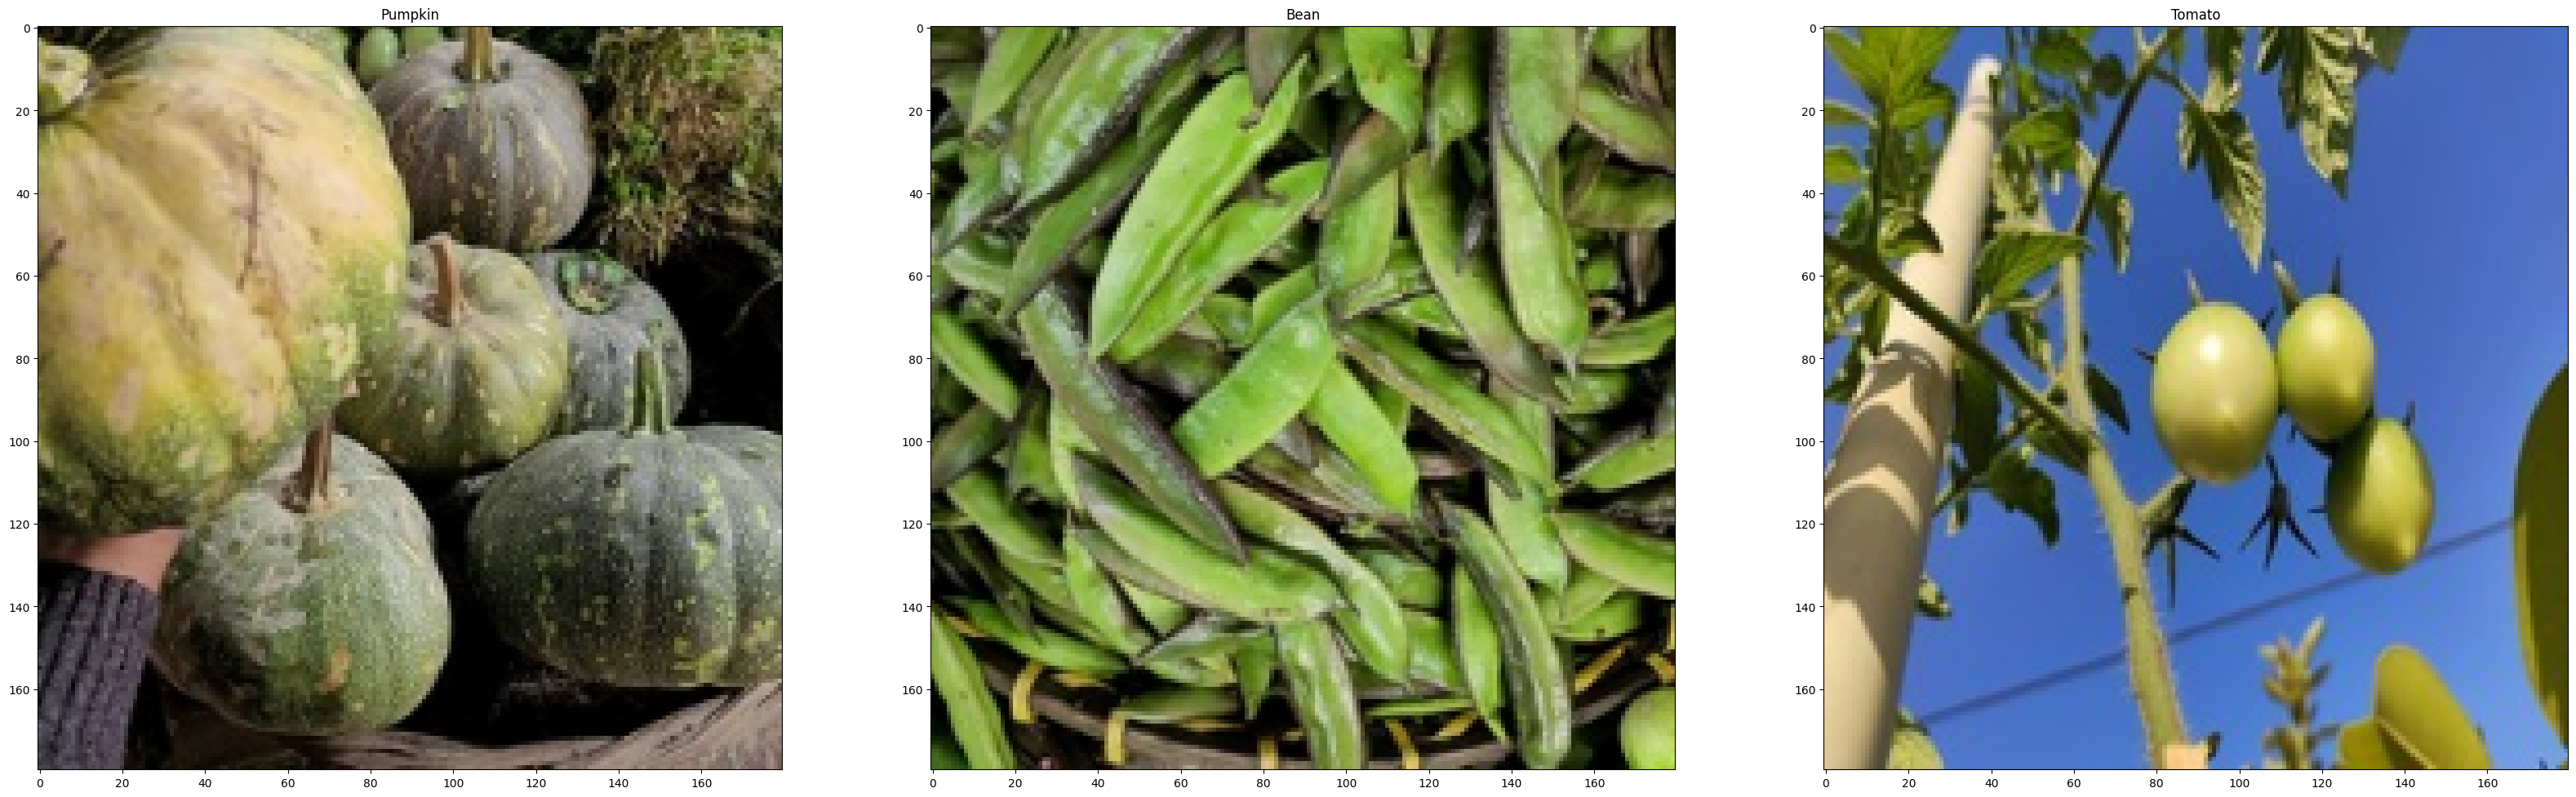

In [ ]:
#Visualización de  muestras aleatorías
# Obtiene una muestra aleatoria de imágenes del conjunto de datos entrenamiento
index = np.random.randint(0, BATCH)
# Obtener un lote aleatorio de imágenes
imagesTrain, labelsTrain = next(iter(train))
imageTrain = imagesTrain[index]
# Muestra la imagen y su etiqueta correspondiente
labelTrain = CLASS_NAMES[labelsTrain[index]]

# Obtiene una muestra aleatoria de imágenes del conjunto de datos validación
index = np.random.randint(0, BATCH)
# Obtener un lote aleatorio de imágenes
imagesVal, labelsVal = next(iter(valid))
imageVal = imagesVal[index]
# Muestra la imagen y su etiqueta correspondiente
labelVal = CLASS_NAMES[labelsVal[index]]

# Obtiene una muestra aleatoria de imágenes del conjunto de datos
index = np.random.randint(0, BATCH)
# Obtener un lote aleatorio de imágenes
imagesTest, labelsTest = next(iter(test))
imageTest = imagesTest[index]
# Muestra la imagen y su etiqueta correspondiente
labelTest = CLASS_NAMES[labelsTest[index]]

#Visualizamos
fig, axes = plt.subplots(1,3)
plt.gcf().set_size_inches(40, 40)
axes[0].imshow(imageTrain.numpy().astype("uint8"))
axes[0].set_title(labelTrain)
axes[1].imshow(imageVal.numpy().astype("uint8"))
axes[1].set_title(labelVal)
axes[2].imshow(imageTest.numpy().astype("uint8"))
axes[2].set_title(labelTest)

plt.show()

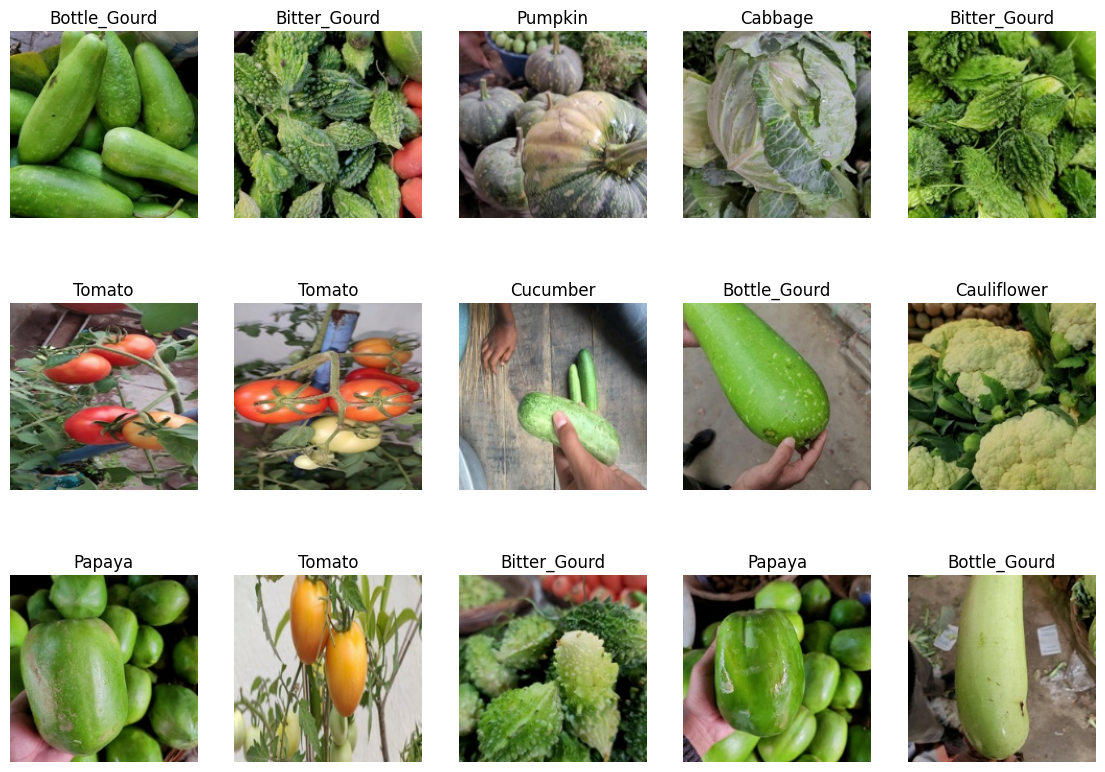

In [ ]:
#Visualización de cada una de las clases
labelNames = CLASS_NAMES
fig = plt.figure(figsize=(14,10))
for n in range(1, 16):
    fig.add_subplot(3, 5, n)
    img = imagesTrain[n]
    plt.imshow(img.numpy().astype("uint8"))
    label = CLASS_NAMES[labelsTrain[n]]
    plt.title(label)
    plt.axis('off')

## 4. Arquitectura Red Neuronal FromScratch

#### **- Creación topología de RN**

In [ ]:
#########################################
###### Definimos la arquitectura ########
#########################################
"""
Para la arquitectura final se tiene presente lo siguiente:
-las capas convolucionales tienen un tamaño de kernel de 3x3 y utilizan un stride de 2x2
para reducir la dimensión de la imagen en cada capa y aumentar la profundidad de características aprendidas.
-se realiza normalización por lotes (BatchNormalization) despues de cada capa,
lo que ayuda a estabilizar el entrenamiento y acelerar la convergencia.
-el conjunto de capas de agrupamiento máximos (MaxPooling2D) se utiliza después de cada conjunto de capas convolucionales
para reducir aún más la dimensión de la imagen y aumentar el tamaño del campo receptivo.
-capa de abandono (Dropout) para reducir el sobreajuste en la red.
"""

#BASE MODEL
# Definimos entradas y normalización
normalization_layer = tf.keras.layers.Rescaling(scale=1./255)
inputs = Input(shape=(IMAGE_SHAPE[0], IMAGE_SHAPE[1], 3))

# Primer set de capas
x1 = normalization_layer(inputs)
x1 = Conv2D(16, (3, 3), strides=(2,2), padding="same", data_format='channels_last', activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), strides=(2,2), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

# Segundo set de capas
x2 = Conv2D(64, (3, 3), strides=(2,2), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(128, (3, 3), strides=(2,2), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)

# Tercer set de capas
x3 = Conv2D(256, (3, 3), strides=(2,2), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)

# TOP MODEL
# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)
xfc = Dense(64, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Clasificador softmax
predictions = Dense(15, activation="softmax")(xfc)

# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
model_cnn = Model(inputs=inputs, outputs=predictions)


In [ ]:
# Resumen de la arquitectura de la red neuronal convolucional
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 16)        448       
                                                                 
 batch_normalization_7 (Batc  (None, 90, 90, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 batch_normalization_8 (Batc  (None, 45, 45, 32)       128       
 hNormalization)                                           

In [ ]:
# Compilación del modelo de red neuronal convolucional (CNN)
"""
-optimizer: se utiliza el optimizador Adam, para ajustar los pesos en el entrenamiento.Ajustando los hiperparámetros
learning_rate, epsilon, beta_1, y beta_2 para controlar la tasa de aprendizaje y la forma en que se actualizan los pesos del modelo.
-loss: función de pérdida, se utiliza SparseCategoricalCrossentropy, que se utiliza para clasificación multiclase con etiquetas enteras.
-metrics: medida adicional utilizada para evaluar el rendimiento del modelo durante el entrenamiento y la evaluación. En este caso, se utiliza la métrica
de precisión (accuracy) para evaluar el porcentaje de predicciones correctas del modelo.
"""
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-08,beta_1=0.9, beta_2=0.999,), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#### **- Entrenamiento de la red neuronal**

In [ ]:
# Guardar modelo durante el entrenamiento
checkpoint_path = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/checkpoint-{epoch:02d}.h5"

# Uso de callbacks diferentes para controlar el entrenamiento del modelo.
"""
-LearningRateScheduler, permite ajustar la tasa de aprendizaje (lr) del modelo durante el entrenamiento.
La tasa de aprendizaje se mantendrá constante durante los primeros 10 epochs y, después de eso, disminuirá gradualmente mediante una exponencial.
-ReduceLROnPlateau, se encarga de reducir la tasa de aprendizaje en función del valor de la precisión de validación. Si la precisión de validación
no mejora después de 2 epochs, la tasa de aprendizaje se reducirá en un factor de 0.2.
-EarlyStopping, que detendrá el entrenamiento si la precisión de validación no mejora después de 5 epochs.
-ModelCheckpoint, que guarda el modelo con los mejores resultados de precisión de validación.
"""
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

checkpoint_callback = [
    tf.keras.callbacks.LearningRateScheduler(scheduler,
    verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.2,
    patience = 2,
    mode = "auto",
    cooldown = 0,
    min_lr = 0.001,
),
    tf.keras.callbacks.EarlyStopping(
        monitor = "val_accuracy",
        patience = 5,
        verbose = 1,
        mode = "auto",

),
    tf.keras.callbacks.ModelCheckpoint(
        filepath = checkpoint_path,
        save_weights_only = False,
        monitor = 'val_accuracy',
        mode = 'auto',
        save_best_only = True
)
]

In [ ]:
# Entrenamiento de la CNN
"""
-epochs, se ajustará a los datos de entrenamiento 50 veces durante el entrenamiento. Teniendo en cuenta que se controla el número de
epochs que el modelo tendra para el entrenamiento con la función EarlyStopping.
"""

epochs = 50
history = model_cnn.fit(train, validation_data=valid, epochs=epochs, shuffle=True, callbacks=[checkpoint_callback])


Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/50
469/469 [==============================] - 1385s 3s/step - loss: 2.5378 - accuracy: 0.2651 - val_loss: 2.4223 - val_accuracy: 0.2417 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/50
469/469 [==============================] - 174s 371ms/step - loss: 1.6148 - accuracy: 0.4880 - val_loss: 0.9233 - val_accuracy: 0.7317 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 3/50
469/469 [==============================] - 172s 368ms/step - loss: 1.2115 - accuracy: 0.6202 - val_loss: 0.6783 - val_accuracy: 0.8043 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 4/50
469/469 [==============================] - 168s 358ms/step - loss: 0.9360 - accuracy: 0.7173 - val_loss: 0.5227 - val_accuracy: 0.8530 - lr: 1.0000e-04

Epoch 5: LearningRateSchedule

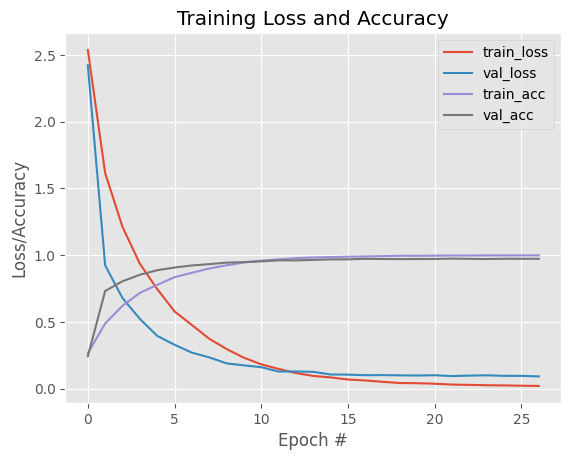

In [ ]:
# Gráfica resultado del entrenamiento
l = len(history.history["loss"])
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, l), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, l), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, l), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, l), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


**Conclusión Entrenamiento**
- En el inicio del entrenamiento, la pérdida es alta y la precisión es baja, a medida que se realiza el entrenamiento, la pérdida disminuye y la precisión aumenta, lo que indica que el modelo está mejorando.
- Se observa que al pasar la Epoch 20 ya la pérdida deja de disminiur notablemente y la precisión deja de aumentar lo cual puede llevar al sobreajuste, lo cual se evita con la función EarlyStopping utilizada la cual detiene el entrenamiento en la epoch 27 obteniendo unos valores de pérdida y precisión aceptables.

- En el proceso de entrenamiento realizado en la creación de la CNN from scratch, se observó que sin una reducción de la dimensionalidad, tales como normalizar las imágenes y disminuir su tamaño, esto generaba que los modelos resultantes presentaran overfitting o sobreajuste, tal como se ve a continuación, con una cantidad de 50 épocas.

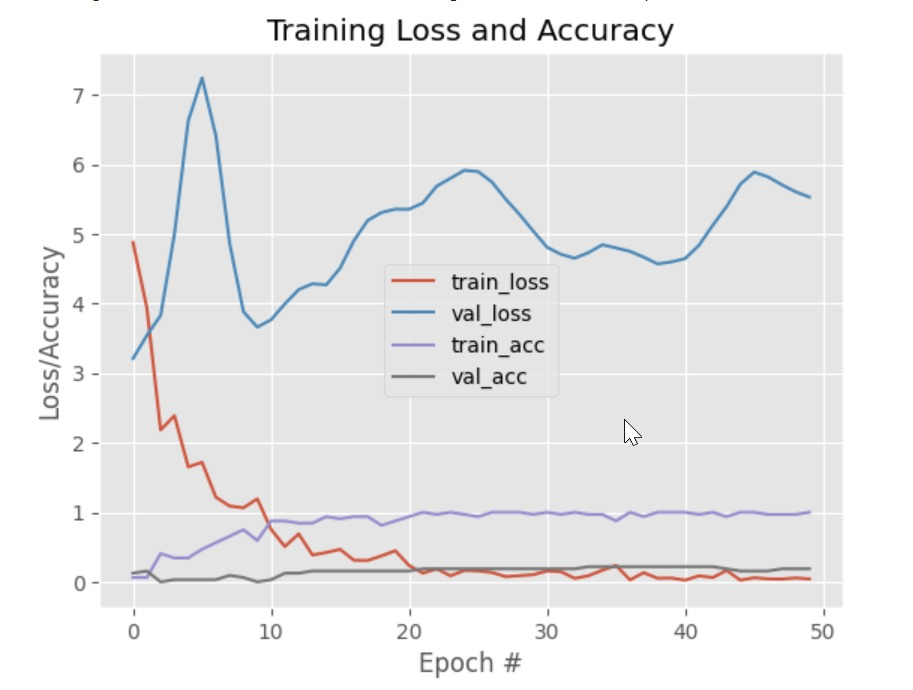

- Adicional de la selección de hiperparametros que fueron configurados en la arquitectura de la red, gracias a los callbacks se pudo tunear el learning rate durante el proceso de entrenamiento, por lo que esto ayudo en gran parte a converger más rápidamente el entrenamiento de la red convolucionar.

#### **- Evaluación del modelo**

In [ ]:
# Evaluar la precisión del modelo
model_cnn.evaluate(test)

94/94 [==============================] - 238s 3s/step - loss: 0.0861 - accuracy: 0.9750


[0.08607513457536697, 0.9750000238418579]

In [ ]:
# Almacenamos el modelo empleando la función mdoel.save de Keras
model_cnn.save(BASE_FOLDER+"deepCNN_Vegetales_2.h5") #(X)

In [ ]:
# Cargar el modelo
model_cnn = load_model(BASE_FOLDER+"deepCNN_Vegetales_2.h5")
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 16)        448       
                                                                 
 batch_normalization_7 (Batc  (None, 90, 90, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 batch_normalization_8 (Batc  (None, 45, 45, 32)       128       
 hNormalization)                                           

In [ ]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions1 = model_cnn.predict(test,batch_size=BATCH) #(X)
predicted_categories = np.argmax(predictions1, axis=1)

[INFO]: Evaluando el modelo...
94/94 [==============================] - 8s 80ms/step


In [ ]:
#### Extraer Ground Truth
true_valid_labels = []

for images, labels in test:
    for label in labels:
        true_valid_labels.append(label.numpy())

In [ ]:
### Reporte de clasificacion para observar las estadisticas del modelo

print(classification_report(true_valid_labels, predicted_categories, target_names=labelNames)) #(X)

              precision    recall  f1-score   support

        Bean       0.98      0.96      0.97       200
Bitter_Gourd       0.97      0.98      0.98       200
Bottle_Gourd       0.99      0.99      0.99       200
     Brinjal       0.96      0.96      0.96       200
    Broccoli       0.97      0.97      0.97       200
     Cabbage       0.96      0.96      0.96       200
    Capsicum       0.99      0.98      0.99       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.96      0.95      0.96       200
    Cucumber       0.98      0.98      0.98       200
      Papaya       0.96      0.98      0.97       200
      Potato       0.99      0.99      0.99       200
     Pumpkin       0.96      0.95      0.95       200
      Radish       0.99      1.00      0.99       200
      Tomato       0.96      0.94      0.95       200

    accuracy                           0.97      3000
   macro avg       0.98      0.97      0.97      3000
weighted avg       0.98   

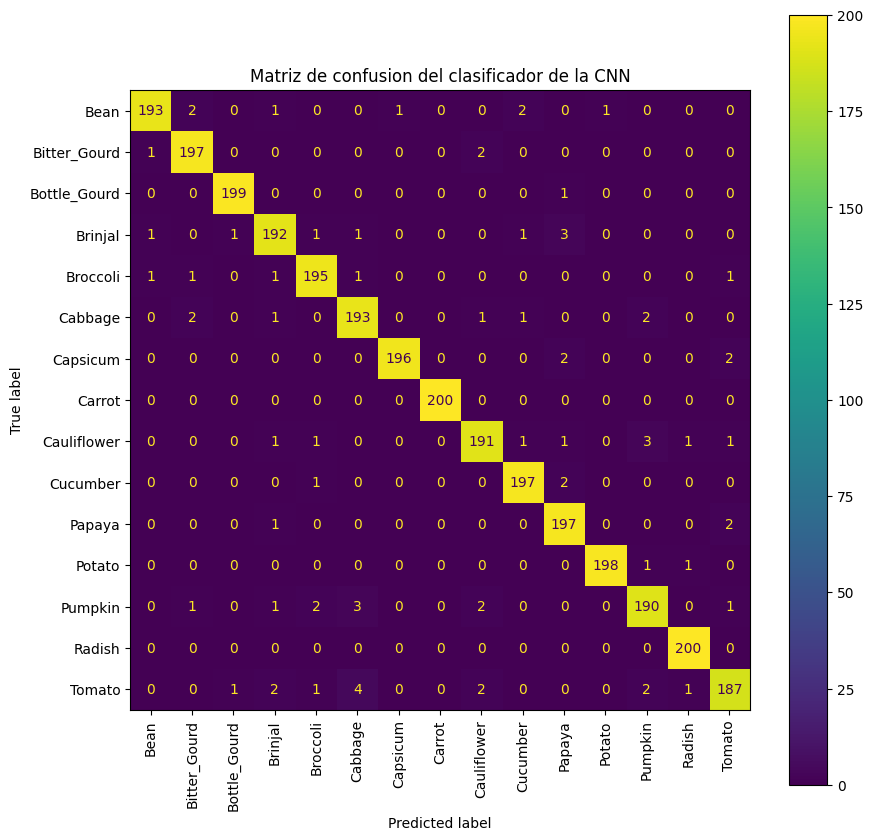

In [ ]:
cf_matrix_result = confusion_matrix(true_valid_labels, predicted_categories )

display = ConfusionMatrixDisplay(cf_matrix_result, display_labels=labelNames)
fig, ax = plt.subplots(figsize=(10,10))
ax.set(title='Matriz de confusion del clasificador de la CNN')
display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

**Conclusión Evaluación**

Métricas:

- el modelo tiene un rendimiento bueno, con puntuaciones F1 de al menos el 95% para todas las clases. La mayoría de las clases tienen una precisión y una recall (sensibilidad) superiores al 95%, lo que sugiere que el modelo puede clasificar con precisión la mayoría de las instancias de prueba en estas clases.
- la precisión y la recall más bajas son del 96% y el 94%, respectivamente, lo que aún indica un buen rendimiento del modelo en general.
- la exactitud general del modelo es del 97%, lo que indica que el modelo clasificó correctamente el 97% de las instancias de prueba.

Matriz de confusion:

- Verdaderos Positivos, las muestras que fueron correctamente identificadas como pertenecientes a la clase positiva. La más baja se obtiene en la clase "Tomato" con un valor de 187 y le sigue "Brinjal"; en cuanto a los valores más altos 100% para las clases "Carrot" y "Radish".
- Falsos Positivos, las muestras que fueron incorrectamente clasificadas como pertenecientes a la clase positiva. Se tiene 9 casos para las clases "Cabbage" y "Papaya"
- Falsos negativos: las muestras que fueron incorrectamente clasificadas como no pertenecientes a la clase positiva. Se obtiene en la clase "Tomato" 13 casos y le sigue "Brinjal" con 8.


## 4. Arquitectura Red Neuronal Pre-entrenada

In [ ]:
#Conversión a One-hot-encodig
train_categorical = train.map(lambda x, y: (x, tf.one_hot(y, N_CLASS)))
valid_categorical = valid.map(lambda x, y: (x, tf.one_hot(y, N_CLASS)))

### 4.1 Red Preentrenada VGG16

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(scale=1./255)

base_model = VGG16(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=(180,180,3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
# conectarlo a nueva parte densa

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(128, activation='relu'))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(Dropout(0.5))
pre_trained_model.add(layers.Dense(64, activation='relu'))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(Dropout(0.5))

# Clasificador softmax
pre_trained_model.add(layers.Dense(15, activation='softmax'))

In [ ]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"])

[INFO]: Compilando el modelo...


In [ ]:
epochs = 10
history = pre_trained_model.fit(train_categorical, validation_data=valid_categorical, epochs=epochs, shuffle=True, callbacks=[checkpoint_callback])

# Almacenamos el modelo empleando la función mdoel.save de Keras
pre_trained_model.save(BASE_FOLDER+"Grupo24_Pretrained.h5") #(X)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10
469/469 [==============================] - 4743s 10s/step - loss: 0.5872 - accuracy: 0.8373 - val_loss: 0.0346 - val_accuracy: 0.9927 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/10
469/469 [==============================] - 54s 115ms/step - loss: 0.1196 - accuracy: 0.9728 - val_loss: 0.0162 - val_accuracy: 0.9960 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/10
469/469 [==============================] - 54s 116ms/step - loss: 0.0550 - accuracy: 0.9884 - val_loss: 0.0114 - val_accuracy: 0.9967 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/10
469/469 [==============================] - 53s 113ms/step - loss: 0.0350 - accuracy: 0.9921 - val_loss: 0.0144 - val_accuracy: 0.9963 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning

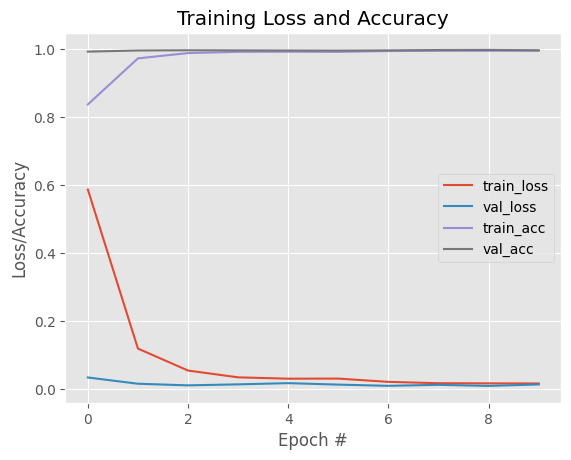

In [ ]:
# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

#### **- Evaluación del modelo**

In [ ]:
#Convertimos a one-hot-encodig
test_categorical = test.map(lambda x, y: (x, tf.one_hot(y, N_CLASS)))

pre_trained_model.evaluate(test_categorical)

94/94 [==============================] - 356s 4s/step - loss: 0.0096 - accuracy: 0.9967


[0.009596021845936775, 0.996666669845581]

In [ ]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions1 = pre_trained_model.predict(test_categorical,batch_size=BATCH) #(X)
predicted_categories = np.argmax(predictions1, axis=1)
# Sacamos el report para test
predicted_categories = np.argmax(predictions1, axis=1)

#### Extraer Ground Truth
true_valid_labels = []

for images, labels in test:
    for label in labels:
        true_valid_labels.append(label.numpy())

### Reporte de clasificacion para observar las estadisticas del modelo

print(classification_report(true_valid_labels, predicted_categories, target_names=labelNames)) #(X)

[INFO]: Evaluando el modelo...
94/94 [==============================] - 8s 81ms/step
              precision    recall  f1-score   support

        Bean       0.98      1.00      0.99       200
Bitter_Gourd       1.00      0.99      0.99       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       1.00      1.00      1.00       200
    Broccoli       1.00      0.98      0.99       200
     Cabbage       0.99      0.99      0.99       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.99      0.99      0.99       200
    Cucumber       1.00      1.00      1.00       200
      Papaya       1.00      0.99      1.00       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       0.99      0.99      0.99       200
      Radish       1.00      1.00      1.00       200
      Tomato       1.00      1.00      1.00       200

    accuracy                           1.00      

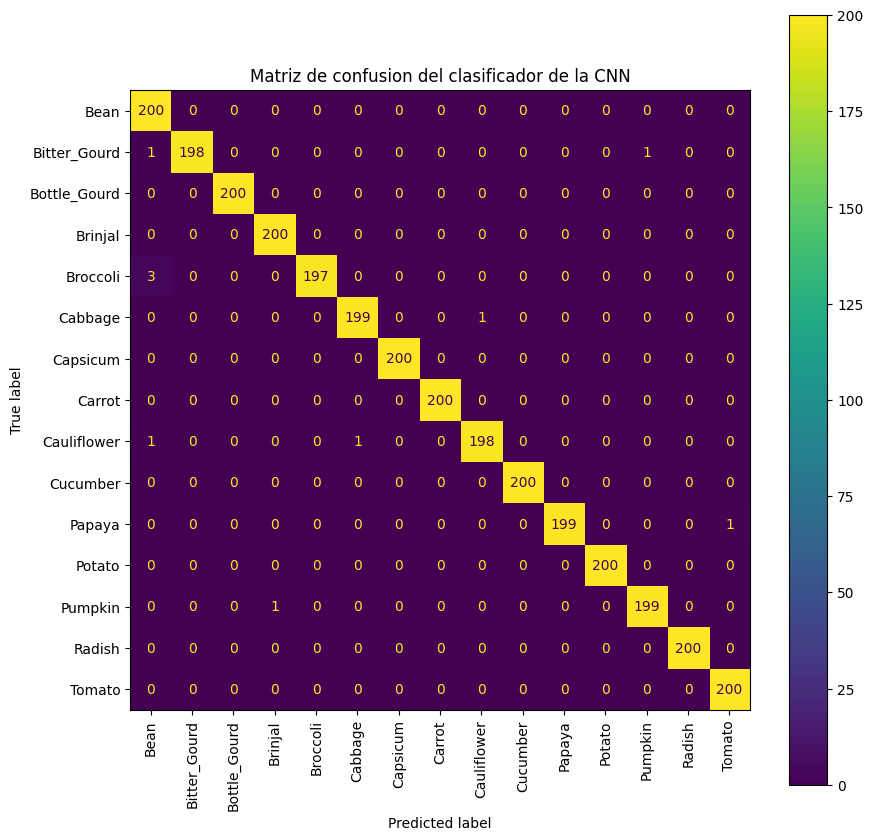

In [ ]:
#Matriz de Confusión
cf_matrix_result = confusion_matrix(true_valid_labels, predicted_categories )

display = ConfusionMatrixDisplay(cf_matrix_result, display_labels=labelNames)
fig, ax = plt.subplots(figsize=(10,10))
ax.set(title='Matriz de confusion del clasificador de la CNN')
display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

**Conclusión Evaluación**

Métricas:

* el modelo tiene un rendimiento bueno, con puntuaciones F1 de casi el 100%. Todas las clases tienen una precisión y una recall (sensibilidad) superior al 98% y en la mayoría de los casos es del 100%, lo cual no indica que es un muy buen modelo para clasificar y resolver este problema.

- la exactitud general del modelo es de casi el 100%, lo que indica -sin redondear- que el modelo clasificó correctamente el 99.7% de las instancias de prueba, eso quiere recir que en 3000 pruebas solo tuvo 10 fallos y el resto 2990 fueron aciertos.

Matriz de confusion:

* Verdaderos Positivos, las muestras que fueron correctamente identificadas como pertenecientes a la clase positiva. La más baja se obtiene en la clase "Broccoli" con un valor de 197.
* Falsos Positivos, las muestras que fueron incorrectamente clasificadas como pertenecientes a la clase positiva. Se tiene 5 casos para las clases "Bean".



### 4.2 Red Preentrenada ResNET


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(scale=1./255)

base_model_RN = ResNet101V2(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=(180,180,3))
base_model_RN.summary()

171317808/171317808 [==============================] - 1s 0us/step
Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPaddi

In [ ]:
# conectarlo a nueva parte densa

base_model_RN.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model_RN)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(128, activation='relu'))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(Dropout(0.5))
pre_trained_model.add(layers.Dense(64, activation='relu'))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(Dropout(0.5))

# Clasificador softmax
pre_trained_model.add(layers.Dense(15, activation='softmax'))

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
#pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0005,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"])
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"])

[INFO]: Compilando el modelo...


In [ ]:
#Conversión a One-hot-encodig
train_categorical = train.map(lambda x, y: (x, tf.one_hot(y, N_CLASS)))
valid_categorical = valid.map(lambda x, y: (x, tf.one_hot(y, N_CLASS)))

In [ ]:
epochs = 20
history = pre_trained_model.fit(train_categorical, validation_data=valid_categorical, epochs=epochs, shuffle=True, callbacks=[checkpoint_callback])

# Almacenamos el modelo empleando la función model.save de Keras
pre_trained_model.save(BASE_FOLDER+"Grupo24_Pretrained_ResNET.h5") #(X)


Epoch 1: LearningRateScheduler setting learning rate to 0.00036787919816561043.
Epoch 1/20
469/469 [==============================] - 75s 159ms/step - loss: 1.0241 - accuracy: 0.6183 - val_loss: 0.6708 - val_accuracy: 0.8033 - lr: 3.6788e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00036787919816561043.
Epoch 2/20
469/469 [==============================] - 65s 138ms/step - loss: 0.9963 - accuracy: 0.6277 - val_loss: 0.4672 - val_accuracy: 0.8840 - lr: 3.6788e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.00036787919816561043.
Epoch 3/20
469/469 [==============================] - 73s 156ms/step - loss: 0.9894 - accuracy: 0.6351 - val_loss: 0.6349 - val_accuracy: 0.8317 - lr: 3.6788e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00036787919816561043.
Epoch 4/20
469/469 [==============================] - 74s 158ms/step - loss: 0.9706 - accuracy: 0.6427 - val_loss: 0.5175 - val_accuracy: 0.8643 - lr: 3.6788e-04

Epoch 5: LearningRateSchedu

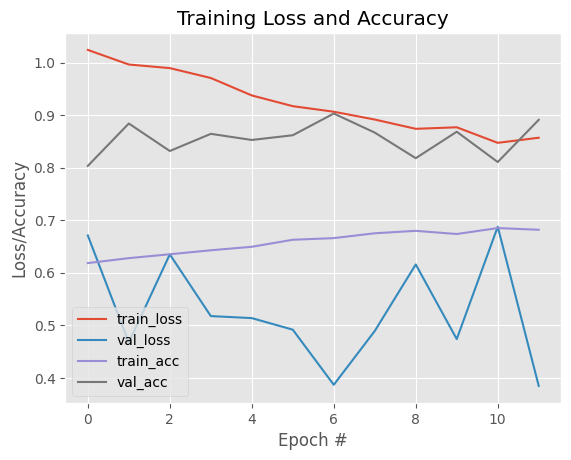

In [ ]:
# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 12), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 12), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 12), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 12), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

#### **- Evaluación del modelo**

In [ ]:
#Convertimos a one-hot-encodig
test_categorical = test.map(lambda x, y: (x, tf.one_hot(y, N_CLASS)))

pre_trained_model.evaluate(test_categorical)

94/94 [==============================] - 314s 3s/step - loss: 0.7739 - accuracy: 0.8987


[0.7739103436470032, 0.8986666798591614]

In [ ]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions1 = pre_trained_model.predict(test_categorical,batch_size=BATCH) #(X)
predicted_categories = np.argmax(predictions1, axis=1)
# Sacamos el report para test
predicted_categories = np.argmax(predictions1, axis=1)

#### Extraer Ground Truth
true_valid_labels = []

for images, labels in test:
    for label in labels:
        true_valid_labels.append(label.numpy())

### Reporte de clasificacion para observar las estadisticas del modelo

print(classification_report(true_valid_labels, predicted_categories, target_names=labelNames)) #(X)

[INFO]: Evaluando el modelo...
94/94 [==============================] - 15s 109ms/step
              precision    recall  f1-score   support

        Bean       0.94      0.92      0.93       200
Bitter_Gourd       0.95      0.94      0.94       200
Bottle_Gourd       0.90      0.95      0.92       200
     Brinjal       0.92      0.80      0.85       200
    Broccoli       0.98      0.91      0.94       200
     Cabbage       0.96      0.65      0.77       200
    Capsicum       0.96      0.96      0.96       200
      Carrot       0.95      0.98      0.97       200
 Cauliflower       0.83      0.85      0.84       200
    Cucumber       0.77      0.96      0.86       200
      Papaya       0.92      0.92      0.92       200
      Potato       0.89      0.97      0.93       200
     Pumpkin       0.86      0.89      0.87       200
      Radish       0.95      0.95      0.95       200
      Tomato       0.76      0.84      0.80       200

    accuracy                           0.90    

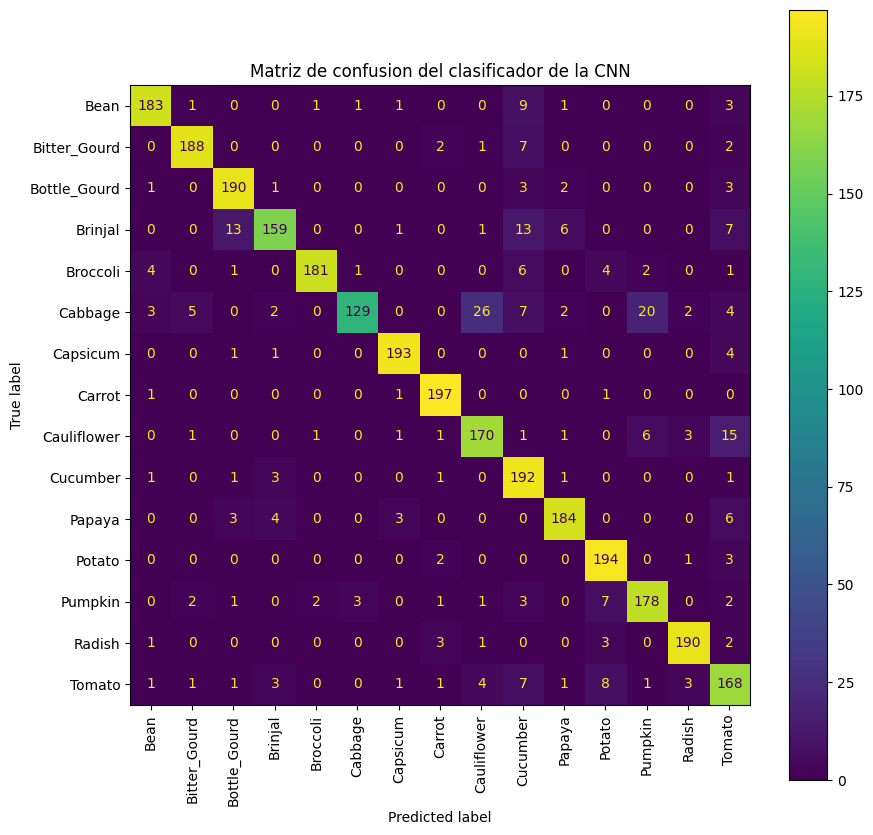

In [ ]:
#Matriz de Confusión
cf_matrix_result = confusion_matrix(true_valid_labels, predicted_categories )

display = ConfusionMatrixDisplay(cf_matrix_result, display_labels=labelNames)
fig, ax = plt.subplots(figsize=(10,10))
ax.set(title='Matriz de confusion del clasificador de la CNN')
display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

**Conclusión Evaluación**

Métricas:

- el modelo tiene un rendimiento bueno, con puntuaciones F1 de al menos el 90% para todas las clases. La mayoría de las clases tienen una precisión y una recall (sensibilidad) superiores al 76%, lo que sugiere que el modelo puede clasificar con precisión la mayoría de las instancias de prueba en estas clases, pero que no es optimo para resolver este problema, dado los hallazgos anteriores.

- la precisión y la recall más bajas son del 76% y el 74%, para "tomato" y "cucumber" respectivamente. Siendo aceptable, pero no mejor que los modelos anteriores con arquitecturas más simples.
- la exactitud general del modelo es del 90%, lo que indica que el modelo clasificó correctamente el 90% de las instancias de prueba.

## 5. Análisis de resultados


- Comparativa Modelos

**Arquitectura propia (scratch)**



    accuracy                           0.97      3000


**VGG-16**

    accuracy                           1.00      3000


**ResNet-101 V2**

    accuracy                           0.90      3000



El modelo que brindó mejor resultado fue en el que utilizamos la arquitectura VGG-16 con solo 10 fallos en las 3000 pruebas realizadas, para una exactitud del 99.7%, seguido de nuestro modelo propio con una exactitud del 97% y finbalmente el modelos ResNET 101 con el 90% de exactitud.


**Arquitectura propia**

Nuestro modelo con aquitectura propia presentaba las siguiente caracterisiticas:

* las capas convolucionales tienen un tamaño de kernel de 3x3 y utilizan un stride de 2x2
para reducir la dimensión de la imagen en cada capa y aumentar la profundidad de características aprendidas.
* se realiza normalización por lotes (BatchNormalization) despues de cada capa,
lo que ayuda a estabilizar el entrenamiento y acelerar la convergencia.
-el conjunto de capas de agrupamiento máximos (MaxPooling2D) se utiliza después de cada conjunto de capas convolucionales
para reducir aún más la dimensión de la imagen y aumentar el tamaño del campo receptivo.
-capa de abandono (Dropout) para reducir el sobreajuste en la red.

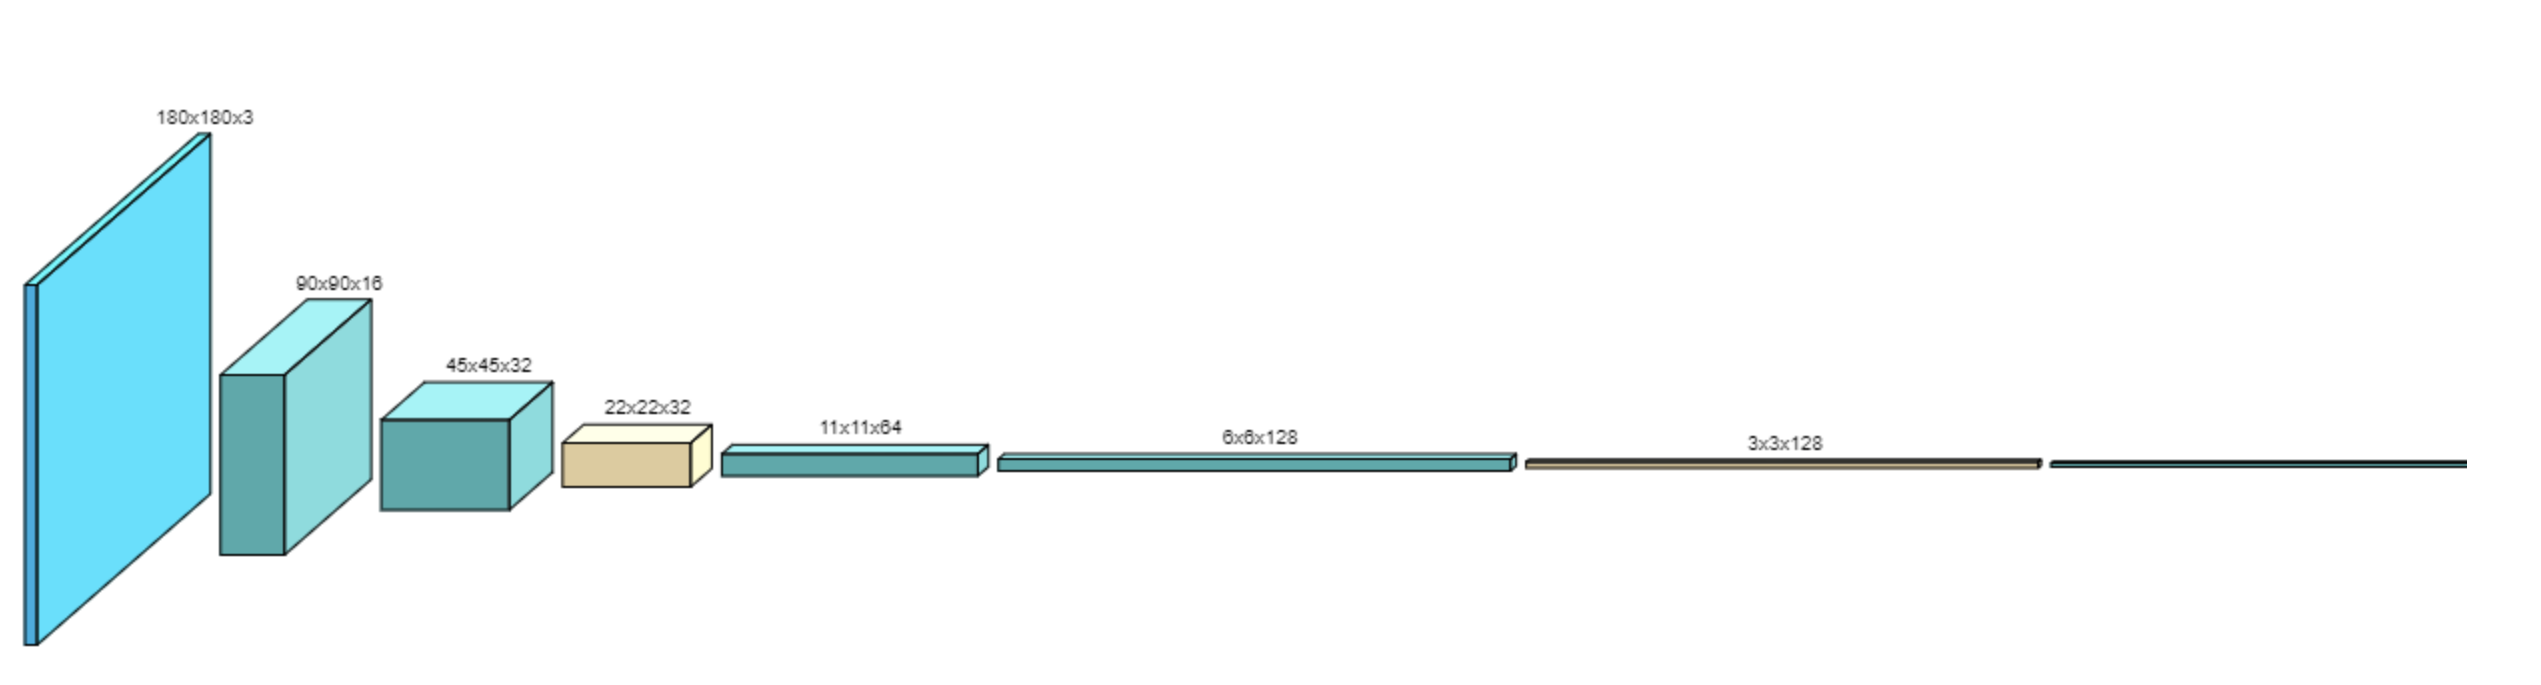

**Modelos pre-entrenados VGG-16 vs ResNet-101 V2**

En el aparte de modelos pre-entrenados se realizó la comparativa entre una red VGG-16 y Resnet101V2 los cuales arrojaron un accuracy cercano al 100% y el 90% respectivamente. Una de las razones por la cual VGG-16 nos brinda un accuracy cercano al 100%, se puede deber a que esta es una red convolucional entrenada con el objetivo de clasificar entre mas de 1000 categorías diferentes y que cuenta con 16 capas de profundidad, siendo esta una arquitectura más sencilla que la Resnet ya que la versión que utilizamos -entre otras varias pruebas de playgrounds que hicimos-  es la 101V2, está tiene 205 capas de profundidad lo que la convierte en una arquitectura más compleja que las VGG-16.




---






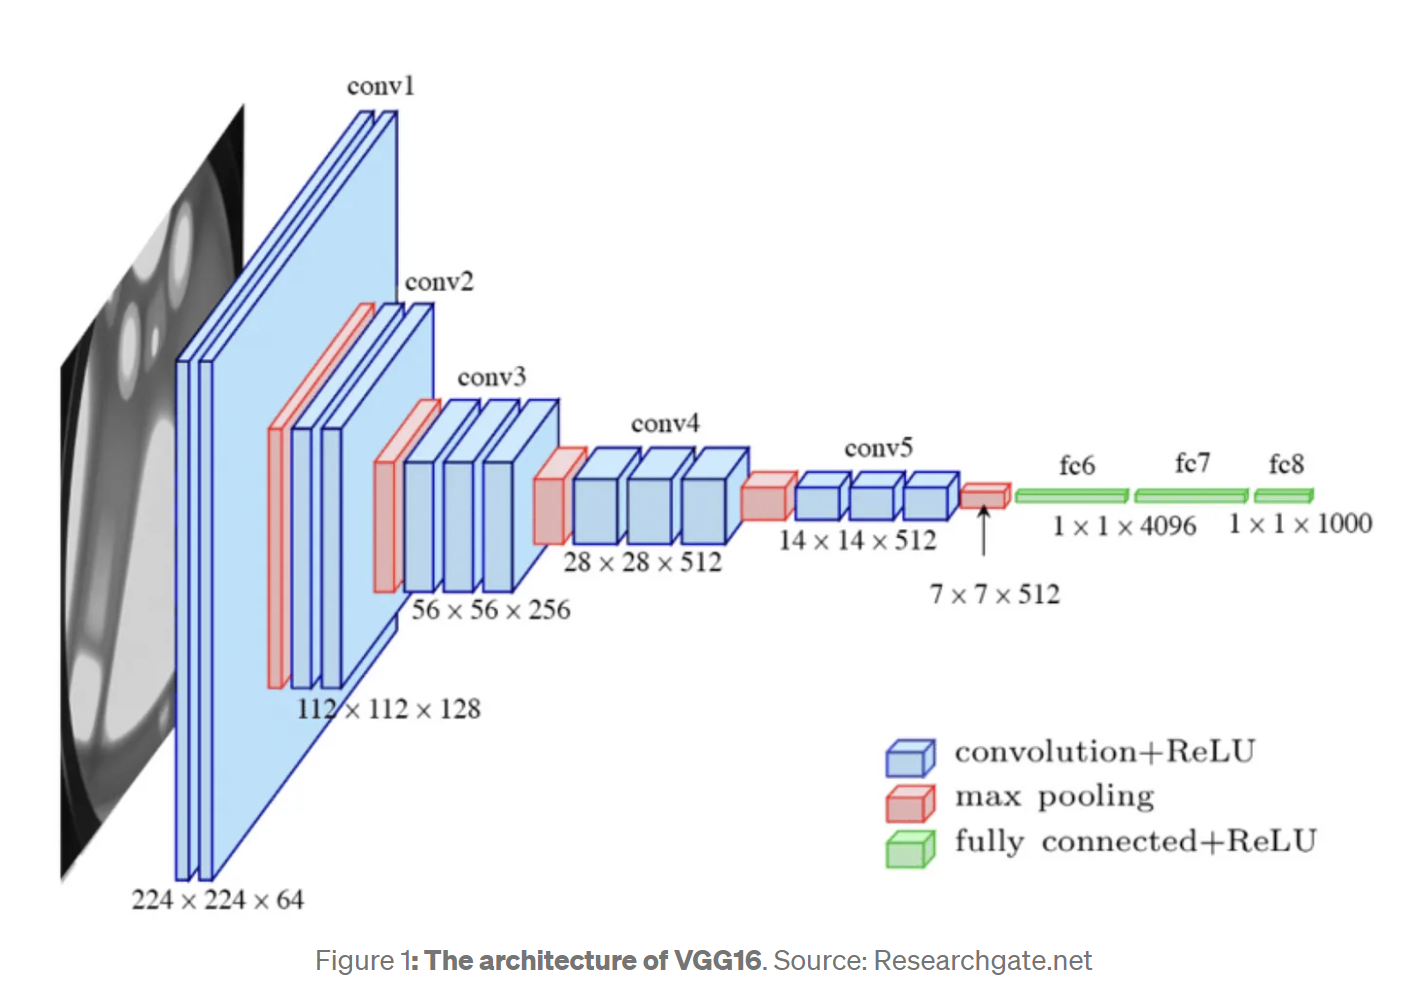

 A lo largo del ejercicio encontramos que las  arquitecturas más simples arrojaban mejores resultados para este ejercicio de clasificación. Lo cual en medio de las pruebas, nos llevó a simplificar nuestra arquitectura inicial from-scratch y a partir de esta experiencia, afrontar la segunda parte del ejercicio probando con redes pre-entrenadas basada en arquitecturas más sencillas.
Está fue la razón porque utilizamos VGG16, en la cual la velocidad de entrenamiento fue muy alta al igual que le precisión en la clasificación, también quisimos contrastar con la ResNET 101 la cual es una red muchísimo más compleja, con muchas más capas de profundidad, siendo está -como era de esperarse- más lenta en entrenamiento y con no tan buenos resultados como la VGG16 o como nuestra arquitectura propia mucho más sencilla.
